<a href="https://colab.research.google.com/github/Kirtiwardhan01/ML-/blob/master/Churn%20Dataset%20-%20Standard%20format.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Churning data - Customer Segmentation  

**Topics**

Review of model evaluation

Model evaluation procedures

Model evaluation metrics

Classification accuracy

Confusion matrix

Metrics computed from a confusion matrix

Adjusting the classification threshold

Receiver Operating Characteristic (ROC) Curves

Area Under the Curve (AUC)


**Review of model evaluation**

Need a way to choose between models: different model types, tuning parameters, and features

Use a model evaluation procedure to estimate how well a model will generalize to out-of-sample data

Requires a model evaluation metric to quantify the model performance

**Model evaluation procedures**
Training and testing on the same data

Rewards overly complex models that "overfit" the training data and won't necessarily generalize
Train/test split

Split the dataset into two pieces, so that the model can be trained and tested on different data

Better estimate of out-of-sample performance, but still a "high variance" estimate

Useful due to its speed, simplicity, and flexibility

K-fold cross-validation
Systematically create "K" train/test splits and average the results together
Even better estimate of out-of-sample performance
Runs "K" times slower than train/test split


#### Importing the packages and dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Exploring the dataset

In [2]:
churn_master_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')
churn_master_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [3]:
churn_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [0]:
churn_master_df.dropna(inplace=True)

Descriptive Statistics

In [5]:
churn_master_df.describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000
mean,0.162201,32.409350,5.441847,64.801981,2282.589168
std,0.368661,24.536259,1.965355,30.070812,2265.506114
min,0.000000,1.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,4.000000,35.650000,401.925000
50%,0.000000,29.000000,6.000000,70.350000,1397.100000
75%,0.000000,55.000000,7.000000,89.850000,3792.325000
max,1.000000,72.000000,9.000000,118.750000,8684.800000


#### Dummy encode the categorical variables

In [0]:
gender_dummies=pd.get_dummies(churn_master_df.gender, prefix='gender',drop_first=True)
Contract_dummies=pd.get_dummies(churn_master_df.Contract, prefix='Contract',drop_first=True)
PaperlessBilling_dummies=pd.get_dummies(churn_master_df.PaperlessBilling,prefix='Paperless Billing',drop_first=True)
Churn_dummies=pd.get_dummies(churn_master_df.Churn,prefix='Churn',drop_first=True)
Seniorcitizen_dummies = pd.get_dummies(churn_master_df.SeniorCitizen,prefix='Senior Citizen',drop_first=True)
ServiceCount_dummies = pd.get_dummies(churn_master_df.ServiceCount,prefix='ServiceCount',drop_first=True)

#### Append the dummy-encoded variables with original dataframe

In [7]:
churn_master_df=pd.concat([churn_master_df,gender_dummies,ServiceCount_dummies,Seniorcitizen_dummies,Contract_dummies,PaperlessBilling_dummies,Churn_dummies,], axis=1)
churn_master_df.shape

(7016, 24)

#### Drop the variables which were dummy-encoded

In [0]:
del churn_master_df['gender']
del churn_master_df['Contract']
del churn_master_df['PaperlessBilling']
del churn_master_df['Churn']
del churn_master_df['customerID']
del churn_master_df['SeniorCitizen']
del churn_master_df['ServiceCount']


In [9]:
churn_master_df.shape

(7016, 17)

#### Define input features and output variable

In [10]:
target=churn_master_df.Churn_Yes
churn_master_df.drop(['Churn_Yes'],1,inplace=True)
features=churn_master_df
print(features.shape)
print(target.shape)

(7016, 16)
(7016,)


Split input and output into desired splits of train and validation

In [0]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

feature_set=ss.fit_transform(features)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feature_set,target,test_size=0.30,random_state=1234)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4911, 16)
(4911,)
(2105, 16)
(2105,)


In [0]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(C=1.0, class_weight='balanced', dual=False, 	fit_intercept=True,intercept_scaling=1, l1_ratio=None, max_iter=100,
                      multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=7066, solver='lbfgs', tol=0.0001, verbose=0,
                      warm_start=False)

from sklearn.metrics import confusion_matrix
cf = confusion_matrix


In [31]:
#Building the model
churn_model = reg.fit(x_train,y_train)
churn_model

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7066, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Doing the prediction 
pred_churn = reg.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

**Classification accuracy:** percentage of correct predictions

In [52]:
predictions = [value for value in pred_churn]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))

Accuracy_score: 74.49% on test dataset
precision_score: 51.02% on test dataset
recall_score: 81.44% on test dataset
f1_score: 62.73% on test dataset


**Null accuracy:** accuracy that could be achieved by always predicting the most frequent class

We must always compare with this

In [53]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    1550
1     555
Name: Churn_Yes, dtype: int64

In [54]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

0.26365795724465557

In [55]:
# calculate the percentage of zeros
1 - y_test.mean()

0.7363420427553444

In [56]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

0.7363420427553444

This means that a dumb model that always predicts 0 would be right 74% of the time

This shows how classification accuracy is not that good as it's close to a dumb model

It's a good way to know the minimum we should achieve with our models


In [57]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.736342
Name: Churn_Yes, dtype: float64

Comparing the true and predicted response values

In [58]:
print('True:', y_test.values[0:25])
print('False:', pred_churn[0:25])

True: [0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0]
False: [1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0]


Conclusion:

Classification accuracy is the easiest classification metric to understand
But, it does not tell you the underlying distribution of response values

We examine by calculating the null accuracy And, it does not tell you what "types" of errors your classifier is making

**Confusion matrix**

Table that describes the performance of a classification model

In [0]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cf = (metrics.confusion_matrix(y_test, pred_churn))

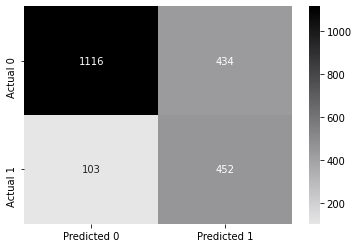

In [61]:
cmap = sns.cubehelix_palette(50,hue = 0.05, rot = 0, light = 0.9, dark = 0, as_cmap = True)
sns.heatmap(cf,cmap = cmap, xticklabels = ['Predicted 0', 'Predicted 1'], yticklabels = ['Actual 0', 'Actual 1'], annot = True, fmt = "d")

Basic terminology

**True Positives (TP):**
 we correctly predicted 452

**True Negatives (TN):**
 we correctly predicted 1116

**False Positives (FP):**
 we incorrectly predicted that they do have diabetes (a "Type I error")
434

**Falsely predict positive**

Type I error

**False Negatives (FN):**
 we incorrectly predicted that they don't have diabetes (a "Type II error")
103

**Falsely predict negative**

Type II error

**0: negative class**

**1: positive class**


In [62]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, pred_churn)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[1116  434]
 [ 103  452]]


Metrics computed from a confusion matrix

Classification Accuracy: Overall, how often is the classifier correct?



In [63]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, pred_churn))

0.7448931116389549
0.7448931116389549


**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

In [64]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, pred_churn))

0.2551068883610451
0.2551068883610451


**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?

Also known as "True Positive Rate" or "Recall"
TP / all positive
all positive = TP + FN

In [65]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, pred_churn))

0.8144144144144144
0.8144144144144144


**Specificity:** When the actual value is negative, how often is the prediction correct?

Something we want to maximize

How "specific" (or "selective") is the classifier in predicting positive instances?
TN / all negative
all negative = TN + FP

In [67]:
specificity = TN /float(TN + FP)

print(specificity)

0.72


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?



In [68]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)



0.28
0.28


Precision: When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?
precision = TP / float(TP + FP)



In [69]:
print(precision)
print(metrics.precision_score(y_test, pred_churn))

0.510158013544018
0.510158013544018


**Many other metrics can be computed: F1 score, Matthews correlation coefficient, etc**

**Conclusion:**

Confusion matrix gives you a more complete picture of how your classifier is performing
Also allows you to compute various classification metrics, and these metrics can guide your model selection

#### Which metrics should you focus on?

Choice of metric depends on your business objective

Identify if FP or FN is more important to reduce and 
Choose metric with relevant variable (FP or FN in the equation)

Churn data (positive class is "Yes"):

Optimize for precision or specificity

precision

false positive as variable

specificity

false positive as variable

Because false negatives are more acceptable than false positives 

Adjusting the classification threshold

In [71]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
reg.predict(x_test)[0:10]

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0], dtype=uint8)

In [72]:
# print the first 10 predicted probabilities of class membership
reg.predict_proba(x_test)[0:10]

array([[0.41836449, 0.58163551],
       [0.32557908, 0.67442092],
       [0.1845488 , 0.8154512 ],
       [0.32100994, 0.67899006],
       [0.26217804, 0.73782196],
       [0.67713126, 0.32286874],
       [0.76906828, 0.23093172],
       [0.85952119, 0.14047881],
       [0.34773921, 0.65226079],
       [0.96318084, 0.03681916]])

Row: observation

Each row, numbers sum to 1

Column: class
2 response classes there 2 columns

column 0: predicted probability that each observation is a member of class 0

column 1: predicted probability that each observation is a member of class 1


Importance of predicted probabilities

We can rank observations by probability of churn


Prioritize contacting those with a higher probability

predict_proba process

Predicts the probabilities

Choose the class with the highest probability

There is a 0.5 classification threshold

Class 1 is predicted if probability > 0.5

Class 0 is predicted if probability < 0.5


In [73]:
# print the first 10 predicted probabilities for class 1
reg.predict_proba(x_test)[0:10, 1]

array([0.58163551, 0.67442092, 0.8154512 , 0.67899006, 0.73782196,
       0.32286874, 0.23093172, 0.14047881, 0.65226079, 0.03681916])

In [0]:
# store the predicted probabilities for class 1
pred_churn_prob = reg.predict_proba(x_test)[:, 1]

In [0]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0, 0.5, 'Frequency')

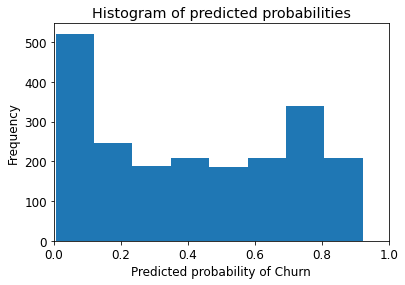

In [77]:
# histogram of predicted probabilities

# 8 bins
plt.hist(pred_churn_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Churn')
plt.ylabel('Frequency')

Receiver Operating Characteristic (ROC) Curves
Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

Answer: Plot the ROC curve.

Receiver Operating Characteristic (ROC)

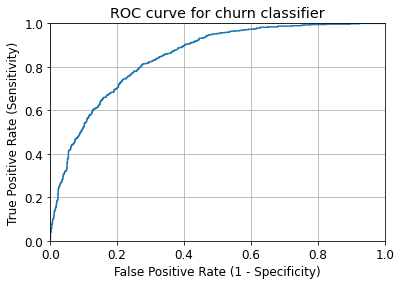

In [78]:
#IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_churn_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for churn classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

You can't actually see the thresholds used to generate the curve on the ROC curve itself

AUC
AUC is the percentage of the ROC plot that is underneath the curve:



In [79]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, pred_churn_prob))

0.845785527462947


AUC is useful as a single number summary of classifier performance

**Higher value = better classifier**

If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation

**AUC is useful even when there is high class imbalance (unlike classification accuracy)**


In [83]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(reg, feature_set, target, cv=10, scoring='roc_auc').mean()

0.8364513589916764

Use both of these whenever possible

Confusion matrix advantages:

Allows you to calculate a variety of metrics

Useful for multi-class problems (more than two response classes)

ROC/AUC advantages:

Does not require you to set a classification threshold

Still useful when there is high class imbalance